In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
numpy.random.seed(7)

In [3]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [7]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 6s - loss: 47567.1418
Epoch 2/200
 - 0s - loss: 41633.9231
Epoch 3/200
 - 0s - loss: 35668.3956
Epoch 4/200
 - 0s - loss: 29454.1014
Epoch 5/200
 - 0s - loss: 23366.6600
Epoch 6/200
 - 0s - loss: 17667.1842
Epoch 7/200
 - 0s - loss: 12724.9653
Epoch 8/200
 - 0s - loss: 8636.3392
Epoch 9/200
 - 0s - loss: 5551.2432
Epoch 10/200
 - 0s - loss: 3408.1715
Epoch 11/200
 - 0s - loss: 2051.1550
Epoch 12/200
 - 0s - loss: 1280.2368
Epoch 13/200
 - 0s - loss: 862.1657
Epoch 14/200
 - 0s - loss: 672.6558
Epoch 15/200
 - 0s - loss: 584.1810
Epoch 16/200
 - 0s - loss: 554.7251
Epoch 17/200
 - 0s - loss: 546.6068
Epoch 18/200
 - 0s - loss: 547.3608
Epoch 19/200
 - 0s - loss: 538.8211
Epoch 20/200
 - 0s - loss: 538.5307
Epoch 21/200
 - 0s - loss: 536.9807
Epoch 22/200
 - 0s - loss: 536.0283
Epoch 23/200
 - 0s - loss: 537.1250
Epoch 24/200
 - 0s - loss: 535.7831
Epoch 25/200
 - 0s - loss: 538.2117
Epoch 26/200
 - 0s - loss: 538.4746
Epoch 27/200
 - 0s - loss: 538.2312
Epoch 28/200
 - 0s

In [10]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.06 MSE (48.53 RMSE)


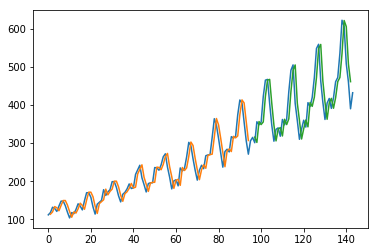

In [11]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
#Now we use the recurrent family of networks. The best architecture of the recurrent network is LSTM and hence we use that.

In [15]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [17]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [18]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [19]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0514
Epoch 2/100
 - 0s - loss: 0.0277
Epoch 3/100
 - 1s - loss: 0.0197
Epoch 4/100
 - 0s - loss: 0.0179
Epoch 5/100
 - 0s - loss: 0.0171
Epoch 6/100
 - 0s - loss: 0.0162
Epoch 7/100
 - 1s - loss: 0.0154
Epoch 8/100
 - 0s - loss: 0.0145
Epoch 9/100
 - 0s - loss: 0.0136
Epoch 10/100
 - 0s - loss: 0.0127
Epoch 11/100
 - 0s - loss: 0.0116
Epoch 12/100
 - 0s - loss: 0.0106
Epoch 13/100
 - 0s - loss: 0.0097
Epoch 14/100
 - 0s - loss: 0.0086
Epoch 15/100
 - 0s - loss: 0.0076
Epoch 16/100
 - 0s - loss: 0.0068
Epoch 17/100
 - 0s - loss: 0.0058
Epoch 18/100
 - 1s - loss: 0.0050
Epoch 19/100
 - 0s - loss: 0.0043
Epoch 20/100
 - 0s - loss: 0.0037
Epoch 21/100
 - 0s - loss: 0.0033
Epoch 22/100
 - 0s - loss: 0.0029
Epoch 23/100
 - 0s - loss: 0.0026
Epoch 24/100
 - 0s - loss: 0.0024
Epoch 25/100
 - 0s - loss: 0.0023
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0021
Epoch 28/100
 - 0s - loss: 0.0021
Epoch 29/100
 - 0s - loss: 0.0021
Epoch 30/100
 - 0s - lo

In [22]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.15 RMSE
Test Score: 47.29 RMSE


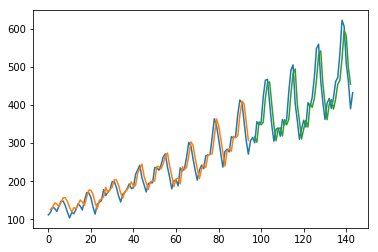

In [23]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()